In [ ]:
### Michelle Kouba
### Movie Review Classifier


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/GitHub/dsc650/dsc650/assignments/assignment05')
!pwd

Mounted at /content/drive
/content/drive/My Drive/GitHub/dsc650/dsc650/assignments/assignment05


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import metrics
from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras.datasets import imdb

## Keras Sequential Movie Review Classifier

In [ ]:
# Loading data and limiting the data to the top 10000 words keeping the vector data a manageable size
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

# Preparing the data
# Manually turning numerical data into tensors for neural network processing (one-hot encoding)
def vectorize_sequences(sequences, dimension=10000):
    # Create matrix of zeros with sequences by dimension shape
    results = np.zeros((len(sequences), dimension))
    # Set specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorizing the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectoring the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
# Building the neural network
# Defining the model (Keras Sequential)
model = models.Sequential()
# Add three layers to the model
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Compiling the optimizer
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Using custom losses and metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])



/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Setting aside a validation set of data (x) and labels (y) (split from the training set)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Training the model for 20 epochs in batches of 512 while monitoring the loss and accuracy of the validation set as well.
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# Fitting the model and returning a dictionary (history) that contains the data of what happened during training.
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.5620 - acc: 0.7607 - val_loss: 0.4346 - val_acc: 0.8589
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3567 - acc: 0.8897 - val_loss: 0.3338 - val_acc: 0.8805
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2676 - acc: 0.9126 - val_loss: 0.2942 - val_acc: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2161 - acc: 0.9295 - val_loss: 0.2839 - val_acc: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1813 - acc: 0.9404 - val_loss: 0.2780 - val_acc: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1538 - acc: 0.9512 - val_loss: 0.2781 - val_acc: 0.8900
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1305 - acc: 0.9594 - val_loss: 0.3059 - val_acc: 0.8794
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1123 - a

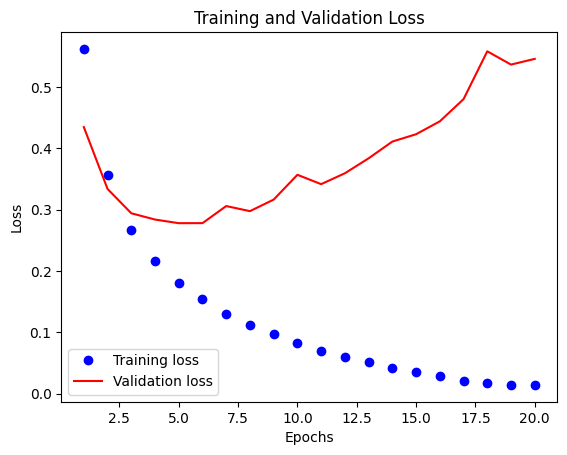

In [ ]:
# Retrieving the training and validation losses as well as the training and validation accuracy from the history dictionary
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Getting the number of epochs needed
epochs = range(1, len(loss_values) + 1)

# Plotting the training and validation loss values
# 'bo' is for blue dot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# 'r' is for red line
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

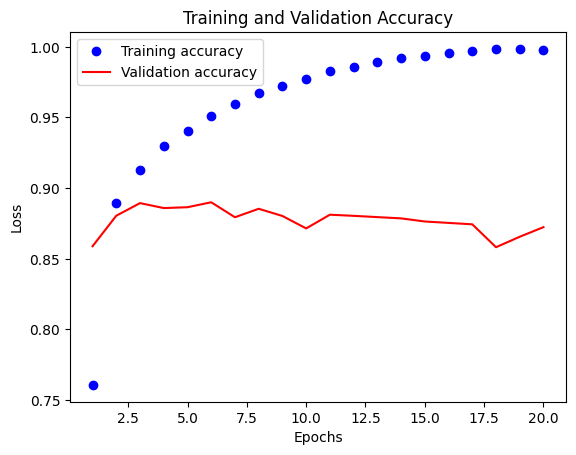

In [ ]:
# Plotting the training and validation accuracy
#Clearing the plot values
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
# 'bo' is for blue dot
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
# 'r' is for red line
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Retraining the model because the graphs about show that you can stop training after three epochs.
# Keras Sequential
model = models.Sequential()
# Add three layers to the model
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train,
                    epochs=4, batch_size=512)
results = model.evaluate (x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4852 - accuracy: 0.8113
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2865 - accuracy: 0.8994
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2223 - accuracy: 0.9178
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3204 - accuracy: 0.8708


In [ ]:
# Using the trained model to make predictions on the testing data
model.predict(x_test)


782/782 [==============================] - 1s 1ms/step


array([[0.12380186],
       [0.99990016],
       [0.4295408 ],
       ...,
       [0.06490404],
       [0.05617931],
       [0.3260995 ]], dtype=float32)